# Credit Card Fraud Detection

The previous exercises made you take a closer look at all the different parts of a neural network: 
* the architecture of a sequential Dense Neural Network, 
* the compilation method
* the fitting.

Let's now work on a real-life dataset that has **a lot of data**!

**The dataset: `Credit Card Transactions`**

For this open challenge, you will `work with data extracted from credit card transactions`. 

As this is `sensitive data`, only 3 columns are known out of a total 31: the rest have been transformed to `anonymize` them (in fact, they are `PCA projections of initial data`).

The 3 known columns are:

* `TIME`: the time elapsed between the transaction and the first transaction in the dataset
* `AMOUNT`: the amount of the transaction
* `CLASS` (our target): 
    * `0 : valid transaction` 
    * `1 : fraudulent transaction`

‚ùì **Question** ‚ùì Start by downloading the dataset:
* on the Kaggle website [here](https://www.kaggle.com/mlg-ulb/creditcardfraud) 
* or from our [URL](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/creditcard.csv) 

Load data to create `X` and `y`

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras import Sequential, layers, Input
from keras.layers import Dense, Dropout, Normalization
from keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall

In [51]:
data = pd.read_csv('creditcard.csv')
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

## 1. Rebalancing classes

In [52]:
# Let's check class balance
y = data.Class
X = data.drop(columns='Class')
pd.Series(y).value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

‚òùÔ∏è in this `fraud detection` challenge, **the classes are extremely imbalanced**:
* 99.8 % of normal transactions
* 0.2 % of fraudulent transactions

**We won't be able to detect cases of fraud unless we apply some serious rebalancing strategies!**

‚ùì **Question** ‚ùì
1. **First**, create three separate splits `Train/Val/Test` from your dataset. It is extremely important to keep validation and testing sets **unbalanced** so that when you evaluate your model, it is done in true conditions, without data leakage. Keep your test set for the very last cell of this notebook!

&nbsp;
2. **Second**, rebalance your training set (and only this one). You have many choices:

- Simply oversample the minority class randomly using plain Numpy functions (not the best option since you are duplicating rows and hence creating data leakage)
- Or use <a href="https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/">**`Synthetic Minority Oversampling Technique - SMOTE`**</a> to generate new datapoints by weighting the existing ones
- In addition, you can also try a <a href="https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/">**`RandomUnderSampler`**</a> to downsample the majority class a little bit

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)
pd.Series(y_val).value_counts(normalize=True)

Class
0    0.998278
1    0.001722
Name: proportion, dtype: float64

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train, y_train = RandomUnderSampler(sampling_strategy=0.1).fit_resample(X_train, y_train)
X_train, y_train = SMOTE(sampling_strategy=0.25).fit_resample(X_train, y_train)

pd.Series(y_train).value_counts(normalize=True)

Class
0    0.800133
1    0.199867
Name: proportion, dtype: float64

## 2. Neural Network iterations

Now that you have rebalanced your classes, try to fit a neural network to optimize your test score. Feel free to use the following hints:

- Normalize your inputs!
    - Use preferably a [`Normalization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization) layer inside the model to "pipeline" your preprocessing within your model. 
    - Or use sklearn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) outside of your model, applied your `X_train` and `X_val` and `X_test`.
- Make your model overfit, then regularize  it using:
    - Early Stopping criteria 
    - [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers
    - or [`regularizers`](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) layers
- üö® Think carefully about the metrics you want to track and the loss function you want to use!


In [57]:
def initialize_model():
    model = Sequential()
    scaler = Normalization()
    scaler.adapt(X_train.to_numpy())
    model.add(scaler)

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.add(layers.Dense(1, 'sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy', 'recall', Precision()],
        optimizer='adam',
        )
    return model

In [ ]:
model = initialize_model()
history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_val, y_val), shuffle=True, callbacks=EarlyStopping(patience=50, restore_best_weights=True))

Epoch 1/1000
95/95 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 33ms/step - accuracy: 0.7888 - loss: 0.5642 - precision_2: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9983 - val_loss: 0.3658 - val_precision_2: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
95/95 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 25ms/step - accuracy: 0.7898 - loss: 0.4495 - precision_2: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9983 - val_loss: 0.3172 - val_precision_2: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
95/95 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 26ms/step - accuracy: 0.7937 - loss: 0.4162 - precision_2: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9983 - val_loss: 0.2789 - val_precision_2: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1000
95/95 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 27ms/step - accuracy: 0.7969 - loss: 0.3905 - precision_2: 0.0000e+00 - recall: 0.0000e+00 - val_accurac

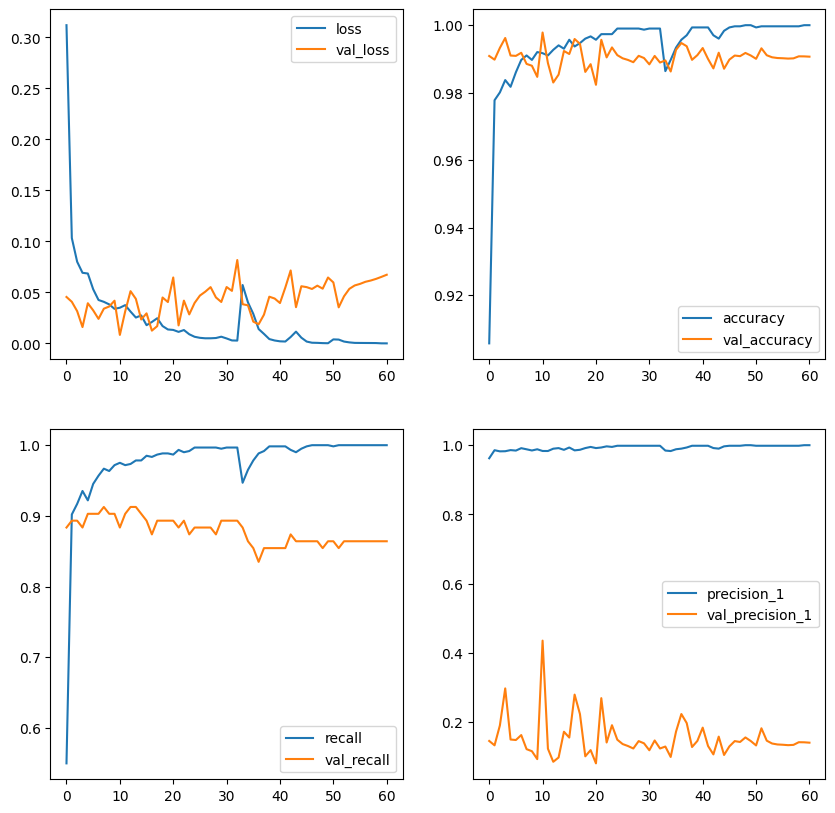

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.lineplot(history.history['loss'], ax=ax[0,0], label='loss')
sns.lineplot(history.history['val_loss'], ax=ax[0,0], label='val_loss')

sns.lineplot(history.history['accuracy'], ax=ax[0,1], label='accuracy')
sns.lineplot(history.history['val_accuracy'], ax=ax[0,1], label='val_accuracy')

sns.lineplot(history.history['recall'], ax=ax[1,0], label='recall')
sns.lineplot(history.history['val_recall'], ax=ax[1,0], label='val_recall')

sns.lineplot(history.history['precision_1'], ax=ax[1,1], label='precision_1')
sns.lineplot(history.history['val_precision_1'], ax=ax[1,1], label='val_precision_1');

### üß™ Test your score

Store below your real test performance on a (`X_test`, `y_test`) representative sample of the original unbalanced dataset into `precision` and `recall` variables.

In [ ]:
loss, accuarcy, recall, precision = model.evaluate(X_test, y_test)
print(loss, accuarcy, recall, precision)

2671/2671 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 1ms/step - accuracy: 0.9980 - loss: 0.0086 - precision_1: 0.4862 - recall: 0.8864
0.00981527753174305 0.9975305199623108 0.8513513803482056 0.4000000059604645


In [43]:
from nbresult import ChallengeResult

result = ChallengeResult('solution',
    precision=precision,
    recall=recall,
    fraud_number=len(y_test[y_test == 1]),
    non_fraud_number=len(y_test[y_test == 0]),
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/bat/.pyenv/versions/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/bat/code/syanrys/06-Deep-Learning/02-Optimizer-loss-and-fitting/data-credit-card-challenge/tests
plugins: dash-3.0.4, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_solution.py::TestSolution::test_is_score_good_enough PASSED         [ 50%]
test_solution.py::TestSolution::test_is_test_set_representative PASSED   [100%]

============================== 2 passed in 0.01s ===============================


üíØ You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master



## üèÅ Optional: Read Google's solution for this challenge
Congratulations for finishing all challenges for this session!

To conclude, take some time to read Google's own solution direcly [on Colab here](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/imbalanced_data.ipynb). 

You will discover interesting techniques and best practices